# readme
descrip: Steve suggests coastal SSH difference is due to different AMOC decreasing between LR and HR. So I plot SSH (future time2 minus future time1 when LR and HR AMOC have same AMOC decreasing). The results are still different, suggesting the Gulf Stream bias (LR GS is too close to the US east coast) contributes to the high sea level rise projected by LR. 

update history: <br>
v1.0 DL 2021Apr29 <br>
v1.1 DL 2021May07 make publication-ready pics <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe
import seawater as sw

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

import Funcs4SeaLevelCESM 

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.109:38356")
client

Client Scheduler: tcp://10.73.3.109:38356 Dashboard: http://10.73.3.109:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# read data

In [3]:
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -85, -15 # 85W - 15W 
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSHsfcVelHistNorthAtlantic_2021May05.png'
pic2 = outdir + 'SSHsfcVelFutureMinusHistNorthAtlantic_2021May05.png'

read velocity files 

In [4]:
#TH: transient HR
infile1_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.B.ne120_t12.sehires38.003.sunway.pop.h.1993-2009_UVVEL_2021Apr29/'
    'B.E.13.B.ne120_t12.sehires38.003.sunway.pop.h.1993-2009av_UVVEL_2021Apr29.nc')

infile2_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/'
'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2084-2100av_UVVEL_2021Apr29.nc')

infile0_TH = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/'
              'ocn/monthly/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

chunk_size_HR = {'nlat':400,'nlon':400}
ds_vel_TH=xr.open_mfdataset([infile1_vel_TH,infile2_vel_TH], compat="override", combine="by_coords",
        data_vars="minimal", coords="minimal", chunks=chunk_size_HR,  parallel=True)
ds0_TH = xr.open_dataset(infile0_TH, chunks=chunk_size_HR)
ds_vel_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 2, z_t: 62)
Coordinates:
  * time        (time) object 2001-07-16 21:59:59.999997 2092-07-16 21:59:59....
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(400, 400), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(400, 400), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 400), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 400), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       Thu Apr 29 14:24:24 2021: ncra -v UVEL,VVEL B.E.13.BHISTC5...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-03-09 at 14:10:02.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  32589011
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [5]:
# TL: transient LR
infile1_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.B.ne30g16.sehires38.003.sunway1993-2009/'
    'B.E.13.B.ne30g16.sehires38.003.sunway1993-2009av_UVVEL_2021Apr29.nc')

infile2_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/'
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.2084-2100av_UVVEL_2021Apr29.nc')

infile0_TL = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/'
        'ocn/monthly/cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')

chunk_size_LR = {'nlat':384,'nlon':320}

ds_vel_TL=xr.open_mfdataset([infile1_vel_TL,infile2_vel_TL], compat="override", combine="by_coords",
        data_vars="minimal", coords="minimal", chunks=chunk_size_LR,  parallel=True)
ds0_TL = xr.open_dataset(infile0_TL,chunks=chunk_size_LR)
ds_vel_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 2, z_t: 60)
Coordinates:
  * time        (time) object 2001-07-16 21:59:59.999997 2092-07-16 21:59:59....
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       Thu Apr 29 16:09:44 2021: ncra -v UVEL,VVEL B.E.13.BHISTC5...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-28 at 12:54:34.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1305625
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

read SSH files

In [6]:
infile1_ssh_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TH = xr.open_dataset(infile1_ssh_TH,chunks=chunk_size_HR)

infile1_ssh_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunk_size_LR)

In [7]:
# infile_ssh_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
#               'raw_data/zos_AVISO_L4_199210-201012.nc.nc4')
# ds_ssh_obs = xr.open_dataset(infile_ssh_obs)
# ds_ssh_obs

In [8]:
# weights_obs = np.cos(np.deg2rad(ds_ssh_obs.lat))
# weights_obs.name = "weights_obs"
# ssh_gl_av_obs = ds_ssh_obs.zos.weighted(weights_obs).mean(("lon", "lat")) # unit: m
# ssh_gl_av_obs.plot()
# ssh_gl_av_obs

In [9]:
# ssh1_obs = (ds_ssh_obs.zos-ssh_gl_av_obs).sel(time=slice('1993','2009')).mean('time')*100 # unit: cm
# ssh1_obs.plot()

# data analysis

In [10]:
# u1_TH = ds_vel_TH.UVEL.isel(time=0,z_t=0).where(ds0_TH.KMT>0, np.nan).compute()
# v1_TH = ds_vel_TH.VVEL.isel(time=0,z_t=0).where(ds0_TH.KMT>0, np.nan).compute()
# u2_TH = ds_vel_TH.UVEL.isel(time=1,z_t=0).where(ds0_TH.KMT>0, np.nan).compute()
# v2_TH = ds_vel_TH.VVEL.isel(time=1,z_t=0).where(ds0_TH.KMT>0, np.nan).compute()

# # sc: shelf currents, mask surface currents in deep ocean
# # u1_sc_TH = ds_TH.UVEL.isel(time=0,z_t=0).where((ds0_TH.KMT>0) & (ds0_TH.HT<2.5e5),
# #                                               np.nan).compute()
# # v1_sc_TH = ds_TH.VVEL.isel(time=0,z_t=0).where((ds0_TH.KMT>0) & (ds0_TH.HT<2.5e5),
# #                                               np.nan).compute()
# # u2_sc_TH = ds_TH.UVEL.isel(time=1,z_t=0).where((ds0_TH.KMT>0) & (ds0_TH.HT<2.5e5),
# #                                               np.nan).compute()
# # v2_sc_TH = ds_TH.VVEL.isel(time=1,z_t=0).where((ds0_TH.KMT>0) & (ds0_TH.HT<2.5e5),
# #                                               np.nan).compute()

# du_TH = u2_TH - u1_TH
# dv_TH = v2_TH - v1_TH
# # du_sc_TH = u2_sc_TH - u1_sc_TH
# # dv_sc_TH = v2_sc_TH - v1_sc_TH

In [11]:
# u1_TL = ds_vel_TL.UVEL.isel(time=0,z_t=0).where(ds0_TL.KMT>0, np.nan).compute()
# v1_TL = ds_vel_TL.VVEL.isel(time=0,z_t=0).where(ds0_TL.KMT>0, np.nan).compute()
# u2_TL = ds_vel_TL.UVEL.isel(time=1,z_t=0).where(ds0_TL.KMT>0, np.nan).compute()
# v2_TL = ds_vel_TL.VVEL.isel(time=1,z_t=0).where(ds0_TL.KMT>0, np.nan).compute()

# # sc: shelf currents, mask surface currents in deep ocean
# # u1_sc_TL = ds_TL.UVEL.isel(time=0,z_t=0).where((ds0_TL.KMT>0) & (ds0_TL.HT<1e5),
# #                                               np.nan).compute()
# # v1_sc_TL = ds_TL.VVEL.isel(time=0,z_t=0).where((ds0_TL.KMT>0) & (ds0_TL.HT<1e5),
# #                                               np.nan).compute()
# # u2_sc_TL = ds_TL.UVEL.isel(time=1,z_t=0).where((ds0_TL.KMT>0) & (ds0_TL.HT<1e5),
# #                                               np.nan).compute()
# # v2_sc_TL = ds_TL.VVEL.isel(time=1,z_t=0).where((ds0_TL.KMT>0) & (ds0_TL.HT<1e5),
# #                                               np.nan).compute()

# du_TL = u2_TL - u1_TL
# dv_TL = v2_TL - v1_TL
# # du_sc_TL = u2_sc_TL - u1_sc_TL
# # dv_sc_TL = v2_sc_TL - v1_sc_TL

regrid sfc vel and choose North Atlantic region

In [12]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
# ds0_g16

infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
# ds0_t12

ds_1deg = xe.util.grid_global(1, 1)

ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_t12_1deg = xe.Regridder(ds0_t12_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_t12_1deg, reuse_weights=True)

ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
weightfile_g16_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_g16_1deg = xe.Regridder(ds0_g16_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_g16_1deg, reuse_weights=True)

In [13]:
# u1_rgd_TH = regridder_t12_1deg(u1_TH)
# v1_rgd_TH = regridder_t12_1deg(v1_TH)
# du_rgd_TH = regridder_t12_1deg(du_TH)
# dv_rgd_TH = regridder_t12_1deg(dv_TH)
# # u1_sc_rgd_TH = regridder_t12_1deg(u1_sc_TH)
# # v1_sc_rgd_TH = regridder_t12_1deg(v1_sc_TH)
# # du_sc_rgd_TH = regridder_t12_1deg(du_sc_TH)
# # dv_sc_rgd_TH = regridder_t12_1deg(dv_sc_TH)


# u1_rgd_TL = regridder_g16_1deg(u1_TL)
# v1_rgd_TL = regridder_g16_1deg(v1_TL)
# du_rgd_TL = regridder_g16_1deg(du_TL)
# dv_rgd_TL = regridder_g16_1deg(dv_TL)
# # u1_sc_rgd_TL = regridder_g16_1deg(u1_sc_TL)
# # v1_sc_rgd_TL = regridder_g16_1deg(v1_sc_TL)
# # du_sc_rgd_TL = regridder_g16_1deg(du_sc_TL)
# # dv_sc_rgd_TL = regridder_g16_1deg(dv_sc_TL)

In [14]:
# u1_rgd_NA_TH = u1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# v1_rgd_NA_TH = v1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# du_rgd_NA_TH = du_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# dv_rgd_NA_TH = dv_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

# # u1_sc_rgd_NA_TH = u1_sc_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # v1_sc_rgd_NA_TH = v1_sc_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # du_sc_rgd_NA_TH = du_sc_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # dv_sc_rgd_NA_TH = dv_sc_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)


# u1_rgd_NA_TL = u1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# v1_rgd_NA_TL = v1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# du_rgd_NA_TL = du_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# dv_rgd_NA_TL = dv_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
#                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

# # u1_sc_rgd_NA_TL = u1_sc_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # v1_sc_rgd_NA_TL = v1_sc_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # du_sc_rgd_NA_TL = du_sc_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
# # dv_sc_rgd_NA_TL = dv_sc_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
# #                                (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

regrid SSH and choose North Atlantic region

In [15]:
ds_ssh_TH.SSH.sel(time=slice('1993','1998')).weighted(ds0_t12.TAREA).mean(("nlon", "nlat")).compute()

<xarray.DataArray 'SSH' (time: 72)>
array([-0.21559982, -0.21559917, -0.21559798, -0.21559687, -0.21559627,
       -0.21559592, -0.21559549, -0.21559535, -0.2155953 , -0.21559502,
       -0.21559463, -0.21559427, -0.21559369, -0.21559325, -0.21559264,
       -0.21559186, -0.21559076, -0.21558981, -0.21558856, -0.21558722,
       -0.21558617, -0.21558525, -0.2155843 , -0.21558278, -0.21558053,
       -0.21557947, -0.21557918, -0.21557828, -0.21557822, -0.21557838,
       -0.21557826, -0.21557766, -0.21557717, -0.21557653, -0.21557593,
       -0.21557546, -0.21557526, -0.21557487, -0.21557529, -0.21557524,
       -0.2155747 , -0.21557465, -0.21557445, -0.21557393, -0.21557303,
       -0.21557196, -0.21557082, -0.21556928, -0.21556785, -0.21556657,
       -0.21556516, -0.21556334, -0.21556176, -0.21556078, -0.21556002,
       -0.21555993, -0.21556042, -0.21556096, -0.21556101, -0.21556081,
       -0.2155606 , -0.21555991, -0.21555802, -0.21555768, -0.21555839,
       -0.21555903, -0.21555897, -0.21555911, -0.21555962, -0.21555925,
       -0.21555807, -0.21555716])
Coordinates:
  * time     (time) object 1993-01-17 00:00:00 ... 1998-12-17 00:00:00

In [16]:
ssh1_TH = ds_ssh_TH.SSH.sel(time=slice('2051','2070')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215 
# subtract global mean of -0.215 cm
ssh1_TH = ssh1_TH.compute()
# mask land with nan and subtract offset for HR
ssh2_TH = ds_ssh_TH.SSH.sel(time=slice('2081','2100')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215
ssh2_TH = ssh2_TH.compute()
dssh_TH = ssh2_TH - ssh1_TH

ssh1_TL = ds_ssh_TL.SSH.sel(time=slice('2051','2070')).mean('time').where(ds0_g16.KMT>0,np.nan)
ssh1_TL = ssh1_TL.compute()
# mask land with nan, no need to subtract offset for LR cause it's too small
ssh2_TL = ds_ssh_TL.SSH.sel(time=slice('2081','2100')).mean('time').where(ds0_g16.KMT>0,np.nan)
ssh2_TL = ssh2_TL.compute()
dssh_TL = ssh2_TL - ssh1_TL

In [17]:
ssh1_rgd_TH = regridder_t12_1deg(ssh1_TH)
dssh_rgd_TH = regridder_t12_1deg(dssh_TH)

ssh1_rgd_TL = regridder_g16_1deg(ssh1_TL)
dssh_rgd_TL = regridder_g16_1deg(dssh_TL)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


In [18]:
ssh1_rgd_NA_TL = ssh1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
ssh1_rgd_NA_TH = ssh1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
dssh_rgd_NA_TL = dssh_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
dssh_rgd_NA_TH = dssh_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
dssh_rgd_NA_TH

<xarray.DataArray 'SSH' (y: 45, x: 70)>
array([[-2.98274848, -3.04347157, -2.18624325, ..., -0.85715683,
        -0.80142386,         nan],
       [-2.4775565 , -2.07409219, -2.05089537, ..., -0.88405109,
                nan,         nan],
       [-2.30012706,         nan, -2.21247139, ..., -0.41622734,
                nan,         nan],
       ...,
       [ 6.51921296,         nan,         nan, ..., -2.85362091,
        -3.23877771, -3.79332675],
       [        nan,  7.4750035 ,  7.21783717, ...,  0.48562964,
         0.47444452,  0.64279023],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    lon      (y, x) float64 -84.5 -83.5 -82.5 -81.5 ... -18.5 -17.5 -16.5 -15.5
    lat      (y, x) float64 20.5 20.5 20.5 20.5 20.5 ... 64.5 64.5 64.5 64.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [19]:
# ssh1_NA_obs = ssh1_obs.sel(lat=slice(lat1, lat2),lon=slice(lon1+360, lon2+360))
# ssh1_NA_obs

compute geostrophic vel

In [20]:
# x_2d, y_2d = Funcs4SeaLevelCESM.CalcLonLat2XY4StandardGridsFunc(ssh1_NA_obs.lon.values,ssh1_NA_obs.lat.values)
# f_raw=sw.f(ssh1_NA_obs.lat)
# f = np.tile(f_raw,(len(ssh1_NA_obs.lon.values),1)).transpose() 
# print(f)
# Ug_obs, Vg_obs = Funcs4SeaLevelCESM.CalcVgeo(ssh1_NA_obs.values, x_2d, y_2d, f)

# make pics

In [21]:
# pc = cartopy.crs.PlateCarree()
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()

# fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='14in',height='12in')

# # row 1: climatology mean ssh
# m00=axs[0,0].contourf(ssh1_rgd_NA_TL.lon, ssh1_rgd_NA_TL.lat, 
#         ssh1_rgd_NA_TL, levels=np.arange(-140,40+1,20), transform=pc, 
#         vmin=-140, vmax=40, cmap="bwr", extend='both')
# # axs[0,0].quiver(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
# #                 u1_rgd_NA_TL, v1_rgd_NA_TL, transform=pc,color='k')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatteras (75.5W, 35.2N)
# axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[0,0].format(land=True, landcolor='grey')
# axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[0,0].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[0,0].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[0,0].xaxis.set_major_formatter(lon_formatter)
# axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[0,0].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('Historic av SSH LR', fontsize=12)
# axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

# m01=axs[0,1].contourf(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
#         xr.ufuncs.sqrt(u1_rgd_NA_TL**2+v1_rgd_NA_TL**2)/100, transform=pc,
#                  levels=np.arange(0,0.8+0.1,0.1),vmin=0,vmax=0.8,cmap='Reds')
# axs[0,1].quiver(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
#                 u1_rgd_NA_TL, v1_rgd_NA_TL, transform=pc,color='k')
# axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Boston (75.5W, 35.2N)
# axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[0,1].format(land=True, landcolor='grey')
# axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[0,1].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[0,1].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[0,1].xaxis.set_major_formatter(lon_formatter)
# axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[0,1].yaxis.set_major_formatter(lat_formatter)
# axs[0,1].set_title('Historic av sfc vel LR', fontsize=12)
# axs[0,1].text(-83, 60, 'b', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,1].colorbar(m01,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)


# m10=axs[1,0].contourf(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, 
#         ssh1_rgd_NA_TH, levels=np.arange(-140,40+1,20), transform=pc, 
#         vmin=-140, vmax=40, cmap="bwr", extend='both')
# # axs[0,1].quiver(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
# #                 u1_rgd_NA_TH, v1_rgd_NA_TH, transform=pc,color='k')
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Boston (75.5W, 35.2N)
# axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[1,0].format(land=True, landcolor='grey')
# axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[1,0].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[1,0].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[1,0].xaxis.set_major_formatter(lon_formatter)
# axs[1,0].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[1,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[1,0].yaxis.set_major_formatter(lat_formatter)
# axs[1,0].set_title('Historic av SSH LR', fontsize=12)
# axs[1,0].text(-83, 60, 'c', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[1,0].colorbar(m10,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

# m11=axs[1,1].contourf(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
#         xr.ufuncs.sqrt(u1_rgd_NA_TH**2+v1_rgd_NA_TH**2)/100, transform=pc,
#                  levels=np.arange(0,0.8+0.1,0.1),vmin=0,vmax=0.8,cmap='Reds')
# axs[1,1].quiver(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
#                 u1_rgd_NA_TH, v1_rgd_NA_TH, transform=pc,color='k')
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Boston (75.5W, 35.2N)
# axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[1,1].format(land=True, landcolor='grey')
# axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[1,1].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[1,1].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[1,1].xaxis.set_major_formatter(lon_formatter)
# axs[1,1].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[1,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[1,1].yaxis.set_major_formatter(lat_formatter)
# axs[1,1].set_title('Historic av sfc vel HR', fontsize=12)
# axs[1,1].text(-83, 60, 'd', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[1,1].colorbar(m11,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)


# m20=axs[2,0].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
#         ssh1_NA_obs, levels=np.arange(-140,40+1,20), transform=pc, 
#         vmin=-140, vmax=40, cmap="bwr", extend='both')
# axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,0].format(land=True, landcolor='grey')
# axs[2,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[2,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Boston (75.5W, 35.2N)
# axs[2,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[2,0].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[2,0].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[2,0].xaxis.set_major_formatter(lon_formatter)
# axs[2,0].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[2,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[2,0].yaxis.set_major_formatter(lat_formatter)
# axs[2,0].set_title('Historic av SSH obs', fontsize=12)
# axs[2,0].text(-83, 60, 'e', transform=pc, fontsize=12, fontweight='bold')
# # Now adding the colorbar
# cb = axs[2,0].colorbar(m20,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

# m21=axs[2,1].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
#         xr.ufuncs.sqrt(Ug_obs**2+Vg_obs**2)/100, transform=pc,
#                  levels=np.arange(0,0.8+0.1,0.1),vmin=0,vmax=0.8,cmap='Reds')
# axs[2,1].quiver(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
#                 Ug_obs, Vg_obs, transform=pc,color='k')
# axs[2,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[2,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,1].format(land=True, landcolor='grey')
# axs[2,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[2,1].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[2,1].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[2,1].xaxis.set_major_formatter(lon_formatter)
# axs[2,1].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[2,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[2,1].yaxis.set_major_formatter(lat_formatter)
# axs[2,1].set_title('Historic av sfc vel obs', fontsize=12)
# axs[2,1].text(-83, 60, 'f', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[2,1].colorbar(m21,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)

# fig1.savefig(pic1,bbox_inches='tight')

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


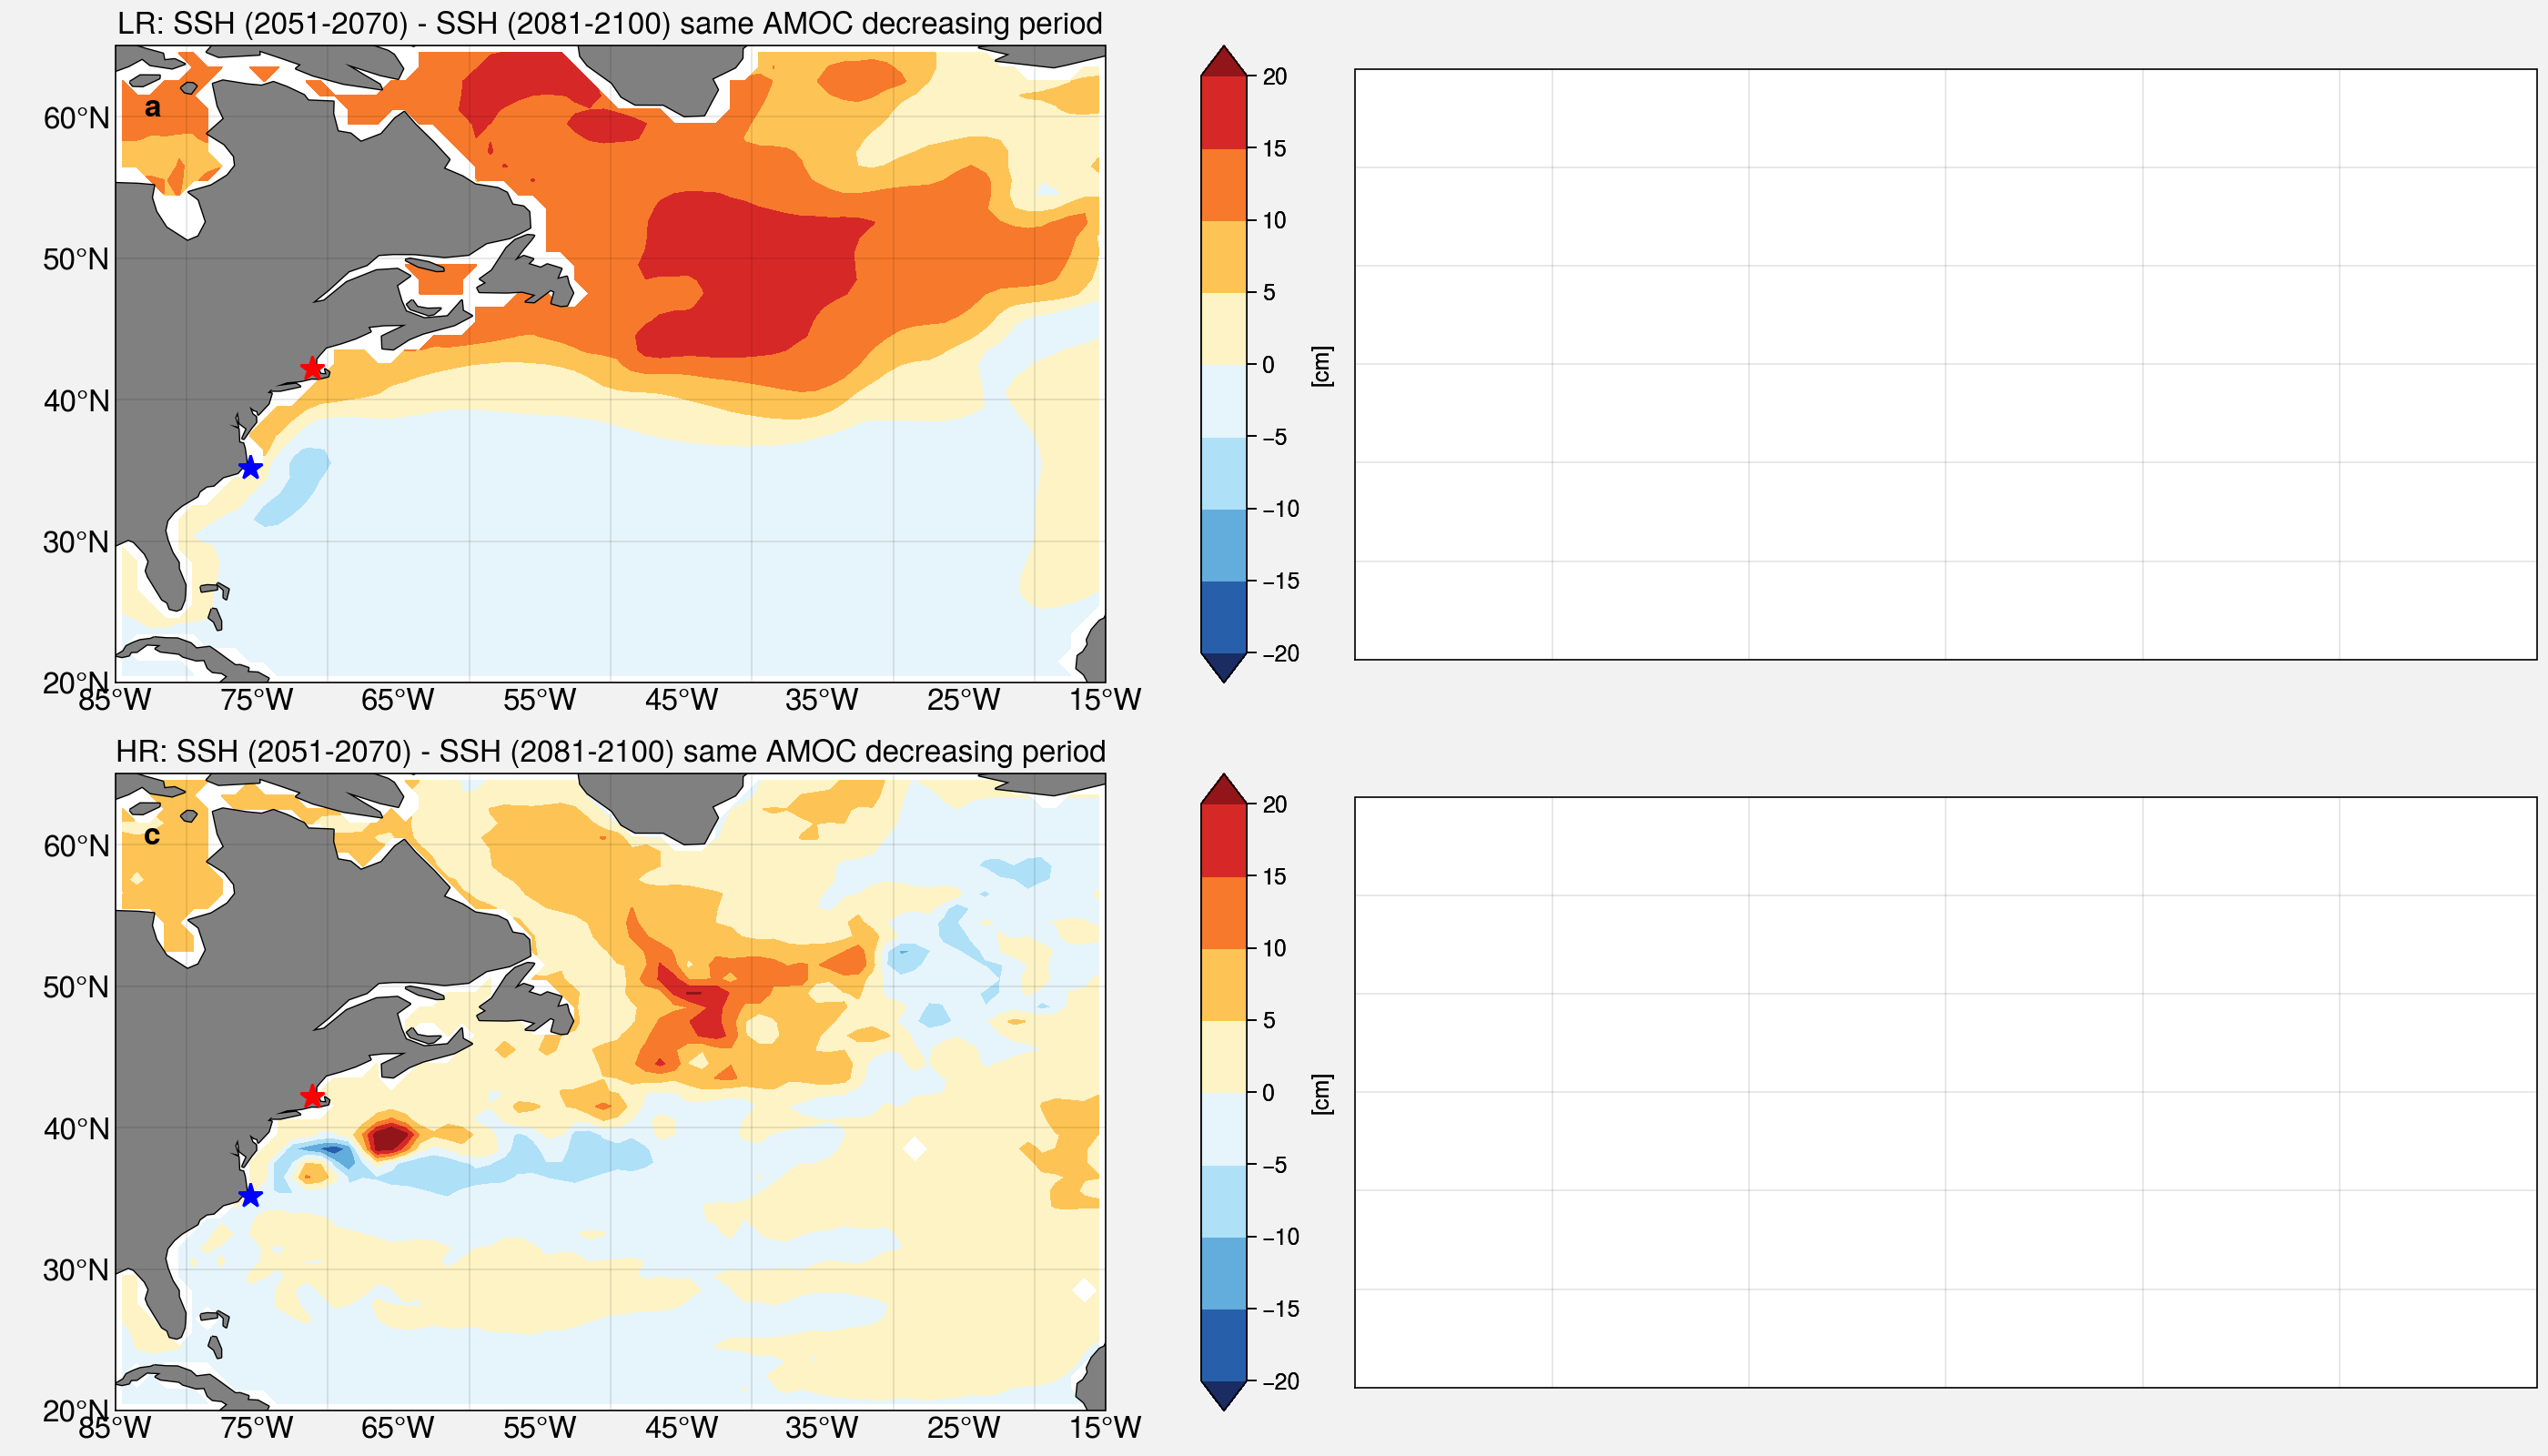

In [22]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='14in',height='8in')

# # row 1: climatology mean ssh
# # row 2: projected ssh change
m00=axs[0,0].contourf(dssh_rgd_NA_TL.lon, dssh_rgd_NA_TL.lat, 
        dssh_rgd_NA_TL, levels=np.arange(-20,20+1,5), transform=pc, 
        vmin=-20, vmax=20, cmap="ColdHot", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-85,-15+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('LR: SSH (2051-2070) - SSH (2081-2100) same AMOC decreasing period', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)


# m01=axs[0,1].contourf(du_rgd_NA_TL.lon, du_rgd_NA_TL.lat, 
#         xr.ufuncs.sqrt(du_rgd_NA_TL**2+dv_rgd_NA_TL**2)/100, transform=pc,
#                  vmin=0,vmax=0.4,levels=np.arange(0,0.2+0.1,0.05),cmap='Oranges')
# axs[0,1].quiver(du_rgd_NA_TL.lon, du_rgd_NA_TL.lat, 
#                 du_rgd_NA_TL, dv_rgd_NA_TL, transform=pc,color='k')
# axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[0,1].format(land=True, landcolor='grey')
# axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[0,1].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[0,1].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[0,1].xaxis.set_major_formatter(lon_formatter)
# axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[0,1].yaxis.set_major_formatter(lat_formatter)
# axs[0,1].set_title('Projected sfc vel change LR', fontsize=12)
# axs[0,1].text(-83, 60, 'b', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,1].colorbar(m01,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)

m10=axs[1,0].contourf(dssh_rgd_NA_TH.lon, dssh_rgd_NA_TH.lat, 
        dssh_rgd_NA_TH, levels=np.arange(-20,20+1,5), transform=pc, 
        vmin=-20, vmax=20, cmap="ColdHot", extend='both')
axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_xticks(np.arange(-85,-15+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[1,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('HR: SSH (2051-2070) - SSH (2081-2100) same AMOC decreasing period', fontsize=12)
axs[1,0].text(-83, 60, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,0].colorbar(m10,loc='r',label='[cm]',extend='both',width='2em',shrink=1)


# m11=axs[1,1].contourf(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#         xr.ufuncs.sqrt(du_rgd_NA_TH**2+dv_rgd_NA_TH**2)/100, transform=pc,
#                  vmin=0,vmax=0.4,levels=np.arange(0,0.2+0.1,0.05),cmap='Oranges')
# axs[1,1].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[1,1].format(land=True, landcolor='grey')
# axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
# axs[1,1].set_xticks(np.arange(-85,-15+1,10), crs=pc)
# axs[1,1].set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
# axs[1,1].xaxis.set_major_formatter(lon_formatter)
# axs[1,1].set_yticks(np.arange(20,60+1,10), crs=pc)
# axs[1,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
# axs[1,1].yaxis.set_major_formatter(lat_formatter)
# axs[1,1].set_title('Projected sfc vel change HR', fontsize=12)
# axs[1,1].text(-83, 60, 'd', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[1,1].colorbar(m11,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)

# fig2.savefig(pic2,bbox_inches='tight')